In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy .stats import zscore
%matplotlib inline

In [28]:
df=pd.read_csv("D:/ML Project1_BMP/bank-marketing.csv")

In [13]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [5]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


## Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [6]:
print(df.pdays.describe())        #We can see that min,25th,50th and 75th percentile are all -1 which is odd as these are days.

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [8]:
df['pdays'].value_counts()                 # -1 occurs 36954 times out of 45211

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

## Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [29]:
dfp=df[df.pdays != -1]                 #Removing values where pdays =-1

In [30]:
dfp.pdays.describe()              

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

We can see that earlier the mean and median were 40 and -1 and after removing -1 we have 224 and 194.

### Further cleaning data

In [31]:
df = df.drop('contact', axis=1)              #removing "contact" column which has no significance

In [4]:
df['poutcome'].value_counts() 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [32]:
df = df.drop(df[df.poutcome == 'other'].index, axis = 0, inplace = False)        #removing "other" values in poutcome.

In [33]:
df['poutcome'].value_counts() 

unknown    36959
failure     4901
success     1511
Name: poutcome, dtype: int64

In [34]:
df['education'].value_counts() 

secondary    22215
tertiary     12757
primary       6607
unknown       1792
Name: education, dtype: int64

In [35]:
df = df.drop(df[df.education == 'unknown'].index, axis = 0, inplace = False) 

In [36]:
df['education'].value_counts() 

secondary    22215
tertiary     12757
primary       6607
Name: education, dtype: int64

## Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [22]:
dfb=df.groupby(['education'])['balance'].median()
dfb

education
primary      398.0
secondary    387.0
tertiary     572.0
Name: balance, dtype: float64

Text(0.5, 1.0, 'Grouping Education based on median balance')

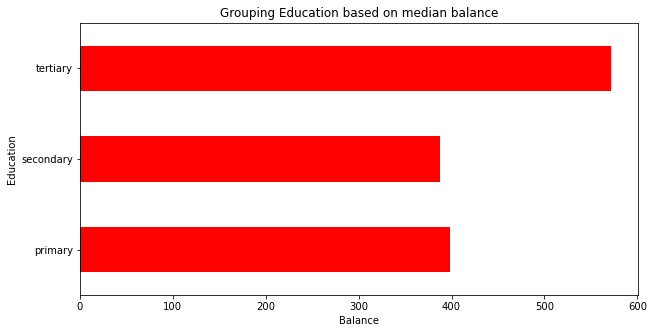

In [21]:
plt.figure(figsize=(10,5))
dfb.plot.barh(color='red')
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on median balance')

We can see that 'tertiary' education has the highest median

## Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

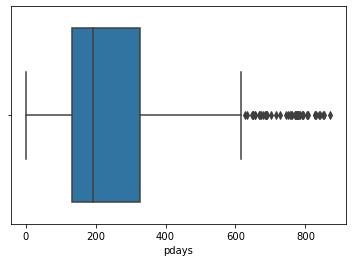

In [22]:
sns.boxplot(x=dfp['pdays'])           # We are using the "pdays" without -1

There are outliers having pdays>600

### creating a new dataframe "numeric_data" for all numeric variables

In [37]:
numeric_data = df.select_dtypes(include =['int64','float64'])
numeric_data.head()

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
5,35,100000,231,5,139,1,-1,0
6,28,100000,447,5,217,1,-1,0


### #creating a new dataframe "categ_data" for all categorical variables.

In [38]:
categ_data = df.select_dtypes(include = ['object'])
categ_data.head()

,job,marital,education,targeted,default,housing,loan,month,poutcome,response
0,management,married,tertiary,yes,no,yes,no,may,unknown,no
1,technician,single,secondary,yes,no,yes,no,may,unknown,no
2,entrepreneur,married,secondary,yes,no,yes,yes,may,unknown,no
5,management,married,tertiary,yes,no,yes,no,may,unknown,no
6,management,single,tertiary,no,no,yes,yes,may,unknown,no


## First, perform bi-variate analysis to identify the features that are directly associated with the target variable.

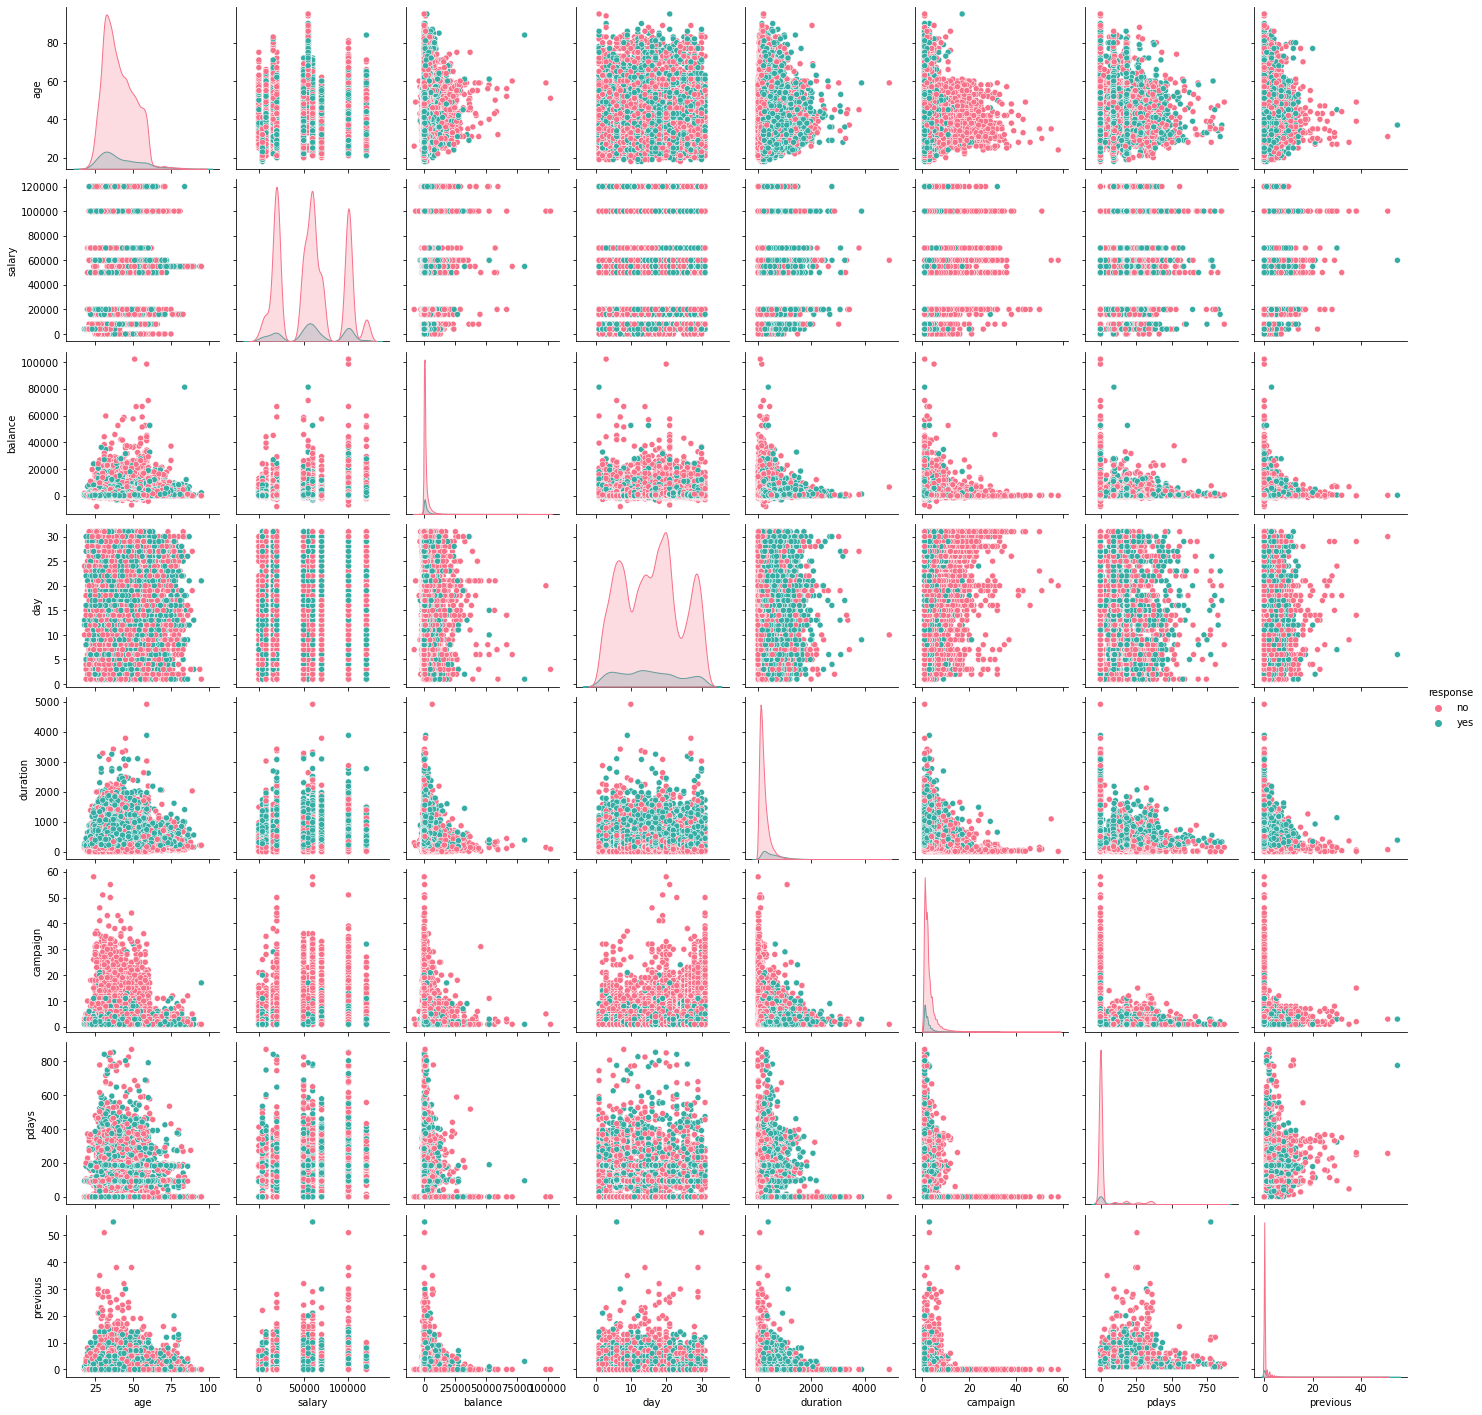

In [65]:
sns.pairplot(df, hue='response', palette="husl")

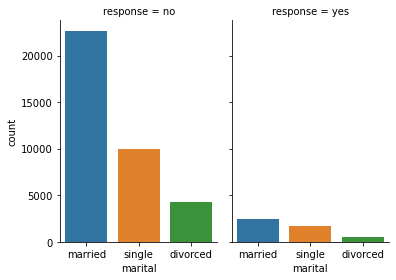

In [25]:
'''
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='marital',hue="response",data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
'''
sns.catplot(x="marital",col="response",data=df, kind="count",height=4, aspect=.7)

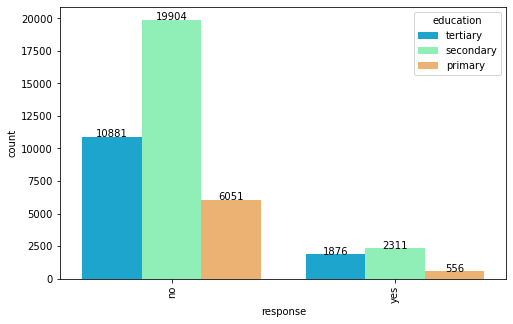

In [29]:
fig, ax1 = plt.subplots(figsize=(8,5))
graph = sns.countplot(ax=ax1,data=df,x = "response",hue="education",palette="rainbow")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<AxesSubplot:title={'center':'age'}, xlabel='response'>

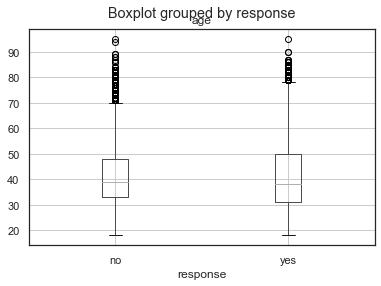

In [32]:
df.boxplot(column="age",by="response")

<AxesSubplot:xlabel='balance', ylabel='age'>

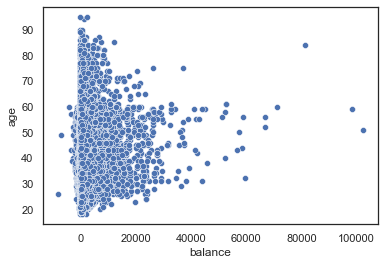

In [55]:
sns.scatterplot(x = df["balance"],y = df["age"])

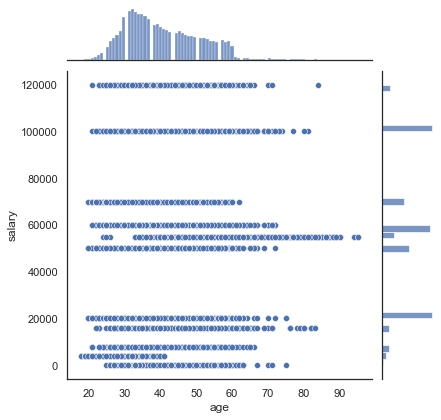

In [56]:
sns.jointplot(x="age",y="salary",data=df)

### Convert the response variable to a convenient form

In [12]:
df.response.value_counts()

no     36836
yes     4743
Name: response, dtype: int64

In [39]:
def convert(x):
    return x.map({'no':0,'yes':1})
df[['response']]=df[['response']].apply(convert)

In [40]:
df.response.value_counts()

0    36836
1     4743
Name: response, dtype: int64

### Make suitable plots for associations with numerical features and categorical features

#### For numerical variables

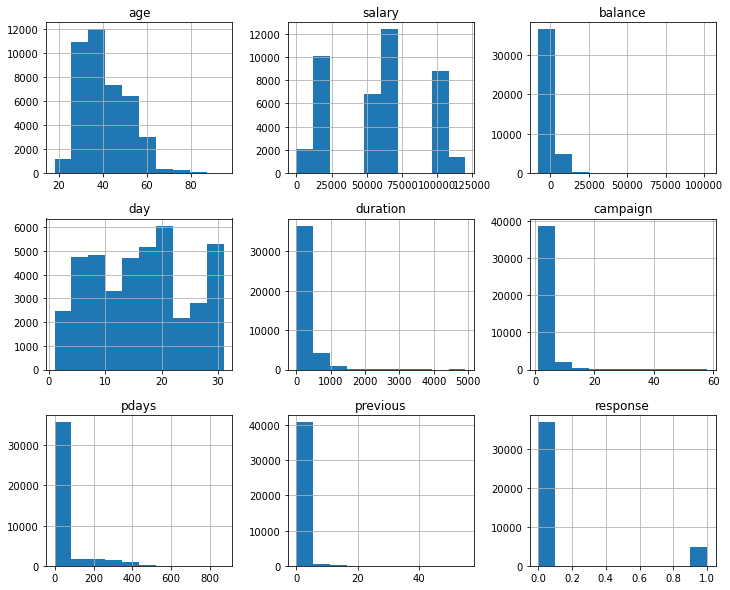

In [29]:
dist=df.hist(figsize=(12,10))

<AxesSubplot:>

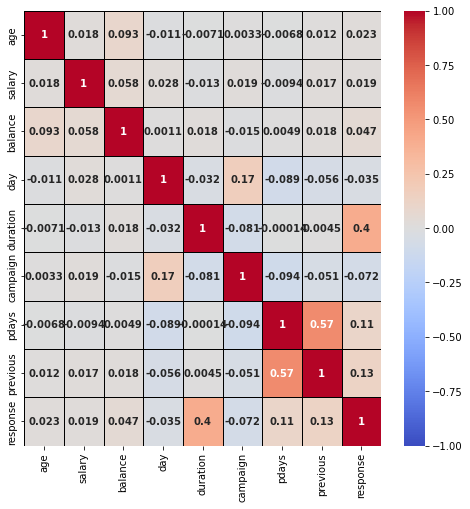

In [30]:
 plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True,linewidth=1,linecolor='black',
            annot_kws={'fontsize':10,'fontweight':'bold'})

#### For categorical variables

<AxesSubplot:xlabel='count', ylabel='job'>

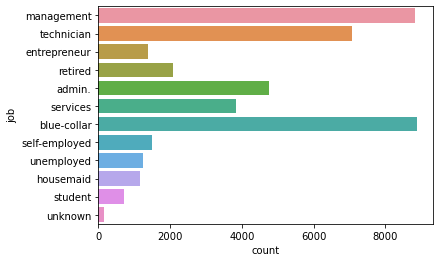

In [31]:
sns.countplot(y='job', data=df)

<AxesSubplot:xlabel='response', ylabel='count'>

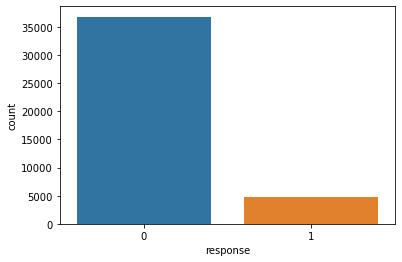

In [32]:
sns.countplot(x='response', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

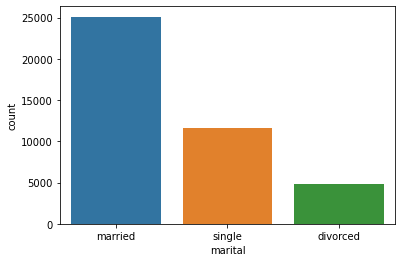

In [33]:
sns.countplot(x='marital', data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

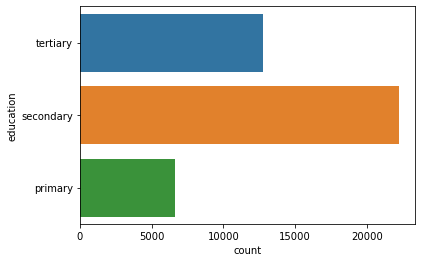

In [34]:
sns.countplot(y='education', data=df)

### Are the features about the previous campaign data useful?

We can see from the correlation plot that previous campaign has some correlation between "balance", "duration" and "campaign".

## Are pdays and poutcome associated with the target?

Most of the values in pdays are -1 and in poutcome are unknown so I will drop these columns as they do not give us anything relevant.

In [41]:
df=df.drop('poutcome', axis=1)

### The necessary transformations for the categorical variables and the numeric variables

In [42]:
lst=['housing','default','loan','targeted']            # converting values of these variables to 0 and 1.

def conver(x):
    return x.map({'no':0,'yes':1})

for i in lst:
    df[[i]]=df[[i]].apply(conver)

lst=['job','education','marital','month']             # creating dummy values for the rest of the categorical variables
for i in lst:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df.drop([i],axis=1,inplace=True)

In [41]:
df.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,100000,1,0,2143,1,0,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,...,0,0,0,0,0,0,1,0,0,0
5,35,100000,1,0,231,1,0,5,139,1,...,0,0,0,0,0,0,1,0,0,0
6,28,100000,0,0,447,1,1,5,217,1,...,0,0,0,0,0,0,1,0,0,0


### Handle variables corresponding to the previous campaign

In [ ]:
poutcome has already been dropped

### Train test split

In [43]:
X=df.drop('response', axis=1)
Y=df['response']

## Predictive model 1: Logistic regression

### Make a predictive model using logistic regression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [45]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)

### Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [46]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm 

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [56]:
import warnings
warnings.simplefilter('ignore')
rfe = RFE(log_reg, 12)
rfe = rfe.fit(X_train,Y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['student', 'unknown', 'aug', 'dec', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'],
      dtype='object')

In [57]:
x_rfe = X_train[rfe_]                     #creating a new dataframe for rfe variables

### Using p values and VIF, get rid of the redundant features

In [58]:
def build_model(X,y):
    X = sm.add_constant(X) 
    log_reg = sm.OLS(y,X).fit() 
    print(log_reg.summary()) 
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [59]:
x_train_new = build_model(x_rfe,Y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        10:04:01   Log-Likelihood:                -7962.1
No. Observations:               33263   AIC:                         1.595e+04
Df Residuals:                   33250   BIC:                         1.606e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1855      0.005     37.386      0.0

In [60]:
x_rfe

,student,unknown,aug,dec,jan,jul,jun,mar,may,nov,oct,sep
24142,0,0,0,0,0,0,0,0,0,1,0,0
1847,0,0,0,0,0,0,0,0,1,0,0,0
25732,0,0,0,0,0,0,0,0,0,1,0,0
25803,0,0,0,0,0,0,0,0,0,1,0,0
32343,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36514,0,0,0,0,0,0,0,0,1,0,0,0
14659,0,0,0,0,0,1,0,0,0,0,0,0
1011,0,0,0,0,0,0,0,0,1,0,0,0
41457,0,1,0,0,0,0,0,0,0,0,0,1


In [61]:
checkVIF(x_train_new)

,Features,VIF
0,const,8.66
9,may,2.52
6,jul,1.99
3,aug,1.92
7,jun,1.79
10,nov,1.60
5,jan,1.22
11,oct,1.12
12,sep,1.09
8,mar,1.08


In [65]:
x_train_new = x_train_new.drop(['unknown'],axis=1)

In [66]:
checkVIF(x_train_new)

,Features,VIF
2,dec,1.00
9,oct,0.50
10,sep,0.33
6,mar,0.23
3,jan,0.21
0,student,0.07
1,aug,0.04
4,jul,0.03
5,jun,0.03
8,nov,0.03


In [69]:
x_train_new = x_train_new.drop('const',axis=1)

In [70]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     238.7
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        10:07:29   Log-Likelihood:                -7964.3
No. Observations:               33263   AIC:                         1.595e+04
Df Residuals:                   33251   BIC:                         1.605e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1854      0.005     37.367      0.0

In [71]:
checkVIF(x_train_new)

,Features,VIF
0,const,8.66
8,may,2.52
5,jul,1.99
2,aug,1.92
6,jun,1.79
9,nov,1.60
4,jan,1.22
10,oct,1.11
11,sep,1.09
7,mar,1.08


In [72]:
x_train_new = x_train_new.drop(['const'],axis=1)

In [73]:
checkVIF(x_train_new)

,Features,VIF
2,dec,1.00
9,oct,0.50
10,sep,0.33
6,mar,0.23
3,jan,0.21
0,student,0.07
1,aug,0.04
4,jul,0.03
5,jun,0.03
8,nov,0.03


In [74]:
sel_feat=list(x_train_new.columns)

In [75]:
lr_sel = LogisticRegression()
lr_sel.fit(X_train[sel_feat],Y_train)

LogisticRegression()

### Estimate the model performance using k fold cross validation

In [80]:
fname=[X_train,X_train[sel_feat]]
results_c = []
names_c = []
models = []
models.append(('LogisticRegression', LogisticRegression()))
for i in auc:
        kfold = KFold(n_splits=10, random_state=None)    
        # train the model
        cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')    
        results_c.append(cv_results)
        names_c.append(fname)
        msg = "%s: %f (%f)" % (LogisticRegression, cv_results.mean(), cv_results.std())
        print(msg)

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.889727 (0.003752)
<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.885699 (0.005873)


Using K-fold cross validation, accuracy=0.889(88.9%)
Using selected features, accuracy = 0.885(88.5%)

#### For testing dataset

In [84]:
pred = log_reg.predict(X_test)
pred_selected=lr_sel.predict(X_test[sel_feat])

### What is the precision, recall, accuracy of your model?

In [85]:
print(accuracy_score(Y_test, pred))
print(accuracy_score(Y_test, pred_selected))

0.8940596440596441
0.8904521404521405


In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test, pred))

[[7286  121]
 [ 760  149]]


In [89]:
print(classification_report(Y_test, pred))                     #For all features

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7407
           1       0.55      0.16      0.25       909

    accuracy                           0.89      8316
   macro avg       0.73      0.57      0.60      8316
weighted avg       0.87      0.89      0.87      8316



In [90]:
print(classification_report(Y_test, pred_selected))             #For selected features

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7407
           1       0.49      0.05      0.09       909

    accuracy                           0.89      8316
   macro avg       0.69      0.52      0.52      8316
weighted avg       0.85      0.89      0.85      8316



### Which features are the most important from your model?

In [92]:
rfe=list(x_train_new)
rfe

['student',
 'aug',
 'dec',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep']

## Predictive model 2: Random Forest

### Make a predictive model using random forest technique

In [100]:
from sklearn.ensemble import RandomForestClassifier
pmod = RandomForestClassifier(n_estimators=50)
pmod.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

### Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [101]:
Y_pred=pmod.predict(X_test)
conf_mat=confusion_matrix(Y_test,Y_pred)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
mat=pd.DataFrame(conf_mat,index=index,columns=columns)
mat

,predicted no,predicted yes
actual No,7218,189
actual yes,578,331


In [102]:
from sklearn.metrics import *
print('Recall score',round(recall_score(Y_test,Y_pred),3))
print('Precision score',round(precision_score(Y_test,Y_pred),3))

Recall score 0.364
Precision score 0.637


In [103]:
n=[X_train,X_train[sel_feat]]

### Estimate the model performance using k fold cross validation

In [104]:
for i in n:
    kfold = KFold(n_splits=10, random_state=None)    
    cv_results = cross_val_score(LogisticRegression(), i, Y_train, cv=kfold, scoring='accuracy')  
    print('Cross validation score:',cv_results.mean())

Cross validation score: 0.8897273189474915
Cross validation score: 0.8856988711504353


Using K-fold cross validation, accuracy for all features =0.889(88.9%) Using selected features, accuracy = 0.885(88.5%)

### What is the precision, recall, accuracy of your model?

In [105]:
pmod1 = RandomForestClassifier(n_estimators=50)
pmod1.fit(X_train[sel_feat], Y_train)

RandomForestClassifier(n_estimators=50)

In [106]:
Y_pred1=pmod1.predict(X_test[sel_feat])

In [107]:
print(accuracy_score(Y_test, Y_pred))                #Accuracy for all features
print(accuracy_score(Y_test, Y_pred1))               #Accuracy for selected features

0.9077681577681578
0.8893698893698894


In [108]:
print(classification_report(Y_test, Y_pred))          #Classification report for all features

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7407
           1       0.64      0.36      0.46       909

    accuracy                           0.91      8316
   macro avg       0.78      0.67      0.71      8316
weighted avg       0.89      0.91      0.90      8316



In [109]:
classification_report(Y_test, Y_pred1)               #Classification report for selected features

'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94      7407\n           1       0.47      0.09      0.15       909\n\n    accuracy                           0.89      8316\n   macro avg       0.68      0.54      0.55      8316\nweighted avg       0.85      0.89      0.85      8316\n'

Precision score is 0.47

In [111]:
sel_feat

['student',
 'aug',
 'dec',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep']

## Compare the performance of the Random Forest and the logistic model

### Evaluate both models on the test set

The accuracy for test in selected features in logistic regression is 0.8904
The accuracy for test in selected features in random forest is 0.8893

### Which metric did you choose and why?

We used K-fold cross validation to ensure that  the score of our model does not depend on the way we select our train and test subsets.We also used precision score,accuracy score and recall score.

### Which model has better performance on the test set?

Logistic regression has better score than random forest for selected features.

### Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

Yes the features in both models agree and are the same for both the models.